In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [26]:
# biblioteki podstawowe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# biblioteki cikit-learn
from sklearn.model_selection import train_test_split # podział na zbiór testowy i treningowy
from sklearn.metrics import mean_squared_error # funkcja obliczająca metrykę
from sklearn.tree import DecisionTreeRegressor # estymator regresji=regresor
from sklearn.preprocessing import LabelEncoder # funkcja do kodowania etykiet na liczby całkowite
from sklearn.model_selection import GridSearchCV # funkcja przeszukiwania przestrzeni parametrów i walidacji krzyżowej

In [27]:
import math
x = float('nan')
math.isnan(x)

True

In [3]:
#link do folderu z bazą:
%cd "D:\PYTHON UBER"

d:\PYTHON UBER


In [4]:
dfo=pd.read_csv("./dfo.csv")
# pd.options.display.float_format='{:.5f}'.format
pd.set_option('display.float_format', '{:.2f}'.format) # --- > by usunac e+06 itd
# df.describe()
dfo

,AGE,BAGAVAIL,BAGDEPLY,BAGFAIL,CASENO,CHTYPE,DEATH,HEIGHT,HOSPSTAY,INJSEV,MANUSE,OCCNO,ROLE,SEATPOS,SEX,TREATMNT,WEIGHT,CASEID,PSU,YEAR
0,20.00,1.00,7.00,1.00,1.00,0.00,0.00,178.00,0.00,0.00,4.00,1.00,1.00,11.00,1.00,0.00,73.00,1H,2,2004
1,69.00,1.00,1.00,1.00,2.00,0.00,0.00,178.00,0.00,1.00,4.00,1.00,1.00,11.00,1.00,4.00,86.00,2K,2,2004
2,69.00,1.00,1.00,1.00,2.00,0.00,0.00,168.00,7.00,1.00,4.00,2.00,2.00,13.00,2.00,3.00,68.00,2K,2,2004
3,18.00,1.00,1.00,1.00,2.00,0.00,0.00,NaN,2.00,3.00,4.00,1.00,1.00,11.00,1.00,3.00,NaN,2K,2,2004
4,34.00,1.00,1.00,1.00,2.00,0.00,0.00,NaN,2.00,3.00,4.00,2.00,2.00,13.00,1.00,3.00,NaN,2K,2,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110757,23.00,0.00,0.00,0.00,68.00,0.00,0.00,183.00,0.00,0.00,4.00,5.00,2.00,23.00,1.00,0.00,77.00,68J,82,2015
110758,22.00,0.00,0.00,0.00,68.00,0.00,0.00,163.00,4.00,3.00,0.00,6.00,2.00,25.00,2.00,3.00,59.00,68J,82,2015
110759,26.00,NaN,NaN,NaN,70.00,NaN,NaN,NaN,NaN,0.00,NaN,1.00,1.00,11.00,1.00,NaN,NaN,70H,82,2015
110760,22.00,NaN,NaN,NaN,72.00,NaN,NaN,NaN,NaN,0.00,NaN,1.00,1.00,11.00,1.00,NaN,NaN,72H,82,2015


In [17]:
feature_list=['AGE','HOSPSTAY','INJSEV','ROLE','TREATMNT','WEIGHT']
target_label='DEATH'

In [18]:
data=dfo[feature_list+[target_label]].dropna()
data

,AGE,HOSPSTAY,INJSEV,ROLE,TREATMNT,WEIGHT,DEATH
0,20.00,0.00,0.00,1.00,0.00,73.00,0.00
1,69.00,0.00,1.00,1.00,4.00,86.00,0.00
2,69.00,7.00,1.00,2.00,3.00,68.00,0.00
7,18.00,0.00,1.00,1.00,4.00,61.00,0.00
8,63.00,3.00,3.00,1.00,3.00,75.00,0.00
...,...,...,...,...,...,...,...
110754,24.00,0.00,0.00,2.00,0.00,91.00,0.00
110755,24.00,0.00,2.00,2.00,6.00,64.00,0.00
110756,23.00,0.00,2.00,2.00,4.00,57.00,0.00
110757,23.00,0.00,0.00,2.00,0.00,77.00,0.00


In [28]:
cM= dfo.corr()
cM

,AGE,BAGAVAIL,BAGDEPLY,BAGFAIL,CASENO,CHTYPE,DEATH,HEIGHT,HOSPSTAY,INJSEV,MANUSE,OCCNO,ROLE,SEATPOS,SEX,TREATMNT,WEIGHT,PSU,YEAR
AGE,1.00,0.30,0.21,0.28,-0.01,-0.27,0.06,0.31,0.08,0.09,-0.14,-0.33,-0.31,-0.28,0.01,0.04,0.37,-0.02,0.05
BAGAVAIL,0.30,1.00,0.54,0.85,0.00,-0.28,0.00,0.35,-0.00,0.01,-0.08,-0.59,-0.47,-0.56,0.04,0.00,0.31,-0.05,0.15
BAGDEPLY,0.21,0.54,1.00,0.54,0.00,-0.16,-0.02,0.20,-0.08,-0.15,0.01,-0.34,-0.27,-0.33,0.05,-0.11,0.18,-0.05,0.10
BAGFAIL,0.28,0.85,0.54,1.00,-0.00,-0.21,-0.00,0.30,-0.02,-0.01,-0.03,-0.53,-0.43,-0.48,0.05,0.00,0.27,-0.07,0.23
CASENO,-0.01,0.00,0.00,-0.00,1.00,0.01,0.00,-0.00,0.00,0.00,0.01,-0.01,0.00,-0.00,0.01,-0.01,-0.01,-0.01,-0.17
CHTYPE,-0.27,-0.28,-0.16,-0.21,0.01,1.00,-0.01,-0.58,-0.03,-0.08,0.61,0.22,0.23,0.25,0.01,-0.03,-0.40,0.00,0.03
DEATH,0.06,0.00,-0.02,-0.00,0.00,-0.01,1.00,0.02,0.06,0.13,-0.03,-0.02,-0.02,-0.01,-0.02,-0.03,0.04,0.03,-0.02
HEIGHT,0.31,0.35,0.20,0.30,-0.00,-0.58,0.02,1.00,0.05,0.08,-0.47,-0.38,-0.35,-0.36,-0.27,-0.01,0.68,0.01,0.00
HOSPSTAY,0.08,-0.00,-0.08,-0.02,0.00,-0.03,0.06,0.05,1.00,0.27,-0.12,-0.03,-0.03,-0.02,-0.02,0.10,0.06,0.03,-0.04
INJSEV,0.09,0.01,-0.15,-0.01,0.00,-0.08,0.13,0.08,0.27,1.00,-0.24,-0.04,-0.04,-0.03,0.02,0.47,0.11,0.04,-0.05


In [29]:
cM= data[feature_list].corr()
cM

,AGE,HOSPSTAY,INJSEV,ROLE,TREATMNT,WEIGHT
AGE,1.00,0.08,0.09,-0.31,0.04,0.37
HOSPSTAY,0.08,1.00,0.29,-0.03,0.09,0.06
INJSEV,0.09,0.29,1.00,-0.04,0.49,0.10
ROLE,-0.31,-0.03,-0.04,1.00,-0.00,-0.34
TREATMNT,0.04,0.09,0.49,-0.00,1.00,0.03
WEIGHT,0.37,0.06,0.10,-0.34,0.03,1.00


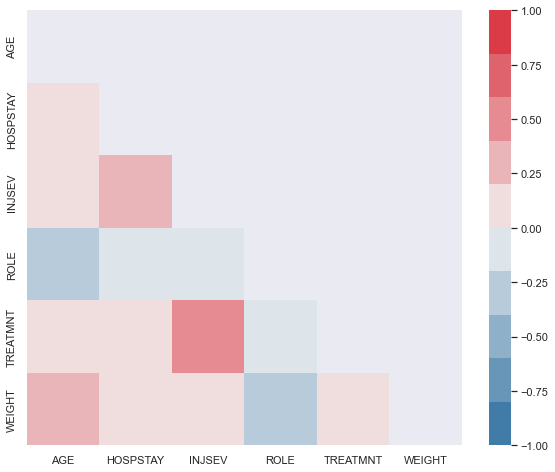

In [30]:
sns.set(rc={'figure.figsize':(10,8)}) # okrślenie rozmiaru rysunku
color_map = sns.diverging_palette(240, 10, n=10) # wybór mapy kolorów
mask = np.triu(np.ones_like(cM), k=0) # maska - ukrycie górnej macierzy trójkątnej
sns.heatmap(cM,vmin=-1.,vmax=1.,cmap=color_map,mask=mask,square=True) # wykonanie wykresu
pass

In [31]:
x= dfo.to_numpy()
x

array([[20.0, 1.0, 7.0, ..., '  1H', 2, 2004],
       [69.0, 1.0, 1.0, ..., '  2K', 2, 2004],
       [69.0, 1.0, 1.0, ..., '  2K', 2, 2004],
       ...,
       [26.0, nan, nan, ..., ' 70H', 82, 2015],
       [22.0, nan, nan, ..., ' 72H', 82, 2015],
       [77.0, nan, nan, ..., ' 76H', 82, 2015]], dtype=object)

In [45]:
dfo.describe()

,AGE,BAGAVAIL,BAGDEPLY,BAGFAIL,CASENO,CHTYPE,DEATH,HEIGHT,HOSPSTAY,INJSEV,MANUSE,OCCNO,ROLE,SEATPOS,SEX,TREATMNT,WEIGHT,PSU,YEAR
count,107831.00,79710.00,79710.00,71491.00,110744.00,87193.00,85760.00,70946.00,83176.00,108448.00,76173.00,110744.00,110731.00,98615.00,109093.00,85470.00,72537.00,110762.00,110762.00
mean,34.04,0.75,3.07,0.75,97.56,0.15,0.32,166.52,1.00,1.39,3.44,1.54,1.34,13.27,1.47,2.25,73.45,42.61,2008.78
std,18.85,0.45,3.11,0.44,65.14,0.90,4.45,20.49,4.05,1.36,2.49,0.98,0.47,5.91,0.56,2.10,23.44,29.07,3.27
min,0.00,0.00,0.00,0.00,1.00,0.00,0.00,30.00,0.00,0.00,0.00,1.00,1.00,11.00,1.00,0.00,3.00,2.00,2004.00
25%,20.00,0.00,0.00,0.00,45.00,0.00,0.00,163.00,0.00,0.00,4.00,1.00,1.00,11.00,1.00,0.00,60.00,11.00,2006.00
50%,29.00,1.00,1.00,1.00,89.00,0.00,0.00,170.00,0.00,1.00,4.00,1.00,1.00,11.00,1.00,3.00,73.00,45.00,2009.00
75%,46.00,1.00,7.00,1.00,139.00,0.00,0.00,178.00,0.00,3.00,4.00,2.00,2.00,13.00,2.00,4.00,86.00,74.00,2011.00
max,97.00,3.00,7.00,2.00,368.00,8.00,96.00,216.00,61.00,6.00,18.00,19.00,2.00,98.00,6.00,8.00,150.00,82.00,2015.00


In [40]:
X=data[feature_list].to_numpy()
X

array([[20.,  0.,  0.,  1.,  0., 73.],
       [69.,  0.,  1.,  1.,  4., 86.],
       [69.,  7.,  1.,  2.,  3., 68.],
       ...,
       [23.,  0.,  2.,  2.,  4., 57.],
       [23.,  0.,  0.,  2.,  0., 77.],
       [22.,  4.,  3.,  2.,  3., 59.]])

In [41]:
y=data[target_label].to_numpy()
y

array([0., 0., 0., ..., 0., 0., 0.])

In [42]:
X = data[feature_list].to_numpy()
y = data[target_label].to_numpy()

#### Podział na zbiór testowy i treningowy

In [43]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=2021)  #losowo generowane elementy

In [44]:
reg1 = DecisionTreeRegressor(random_state=2021)
reg1.fit(train_X, train_y)

DecisionTreeRegressor(random_state=2021)

In [37]:
y_pred = reg1.predict(test_X)
rmse1 = np.sqrt(mean_squared_error(test_y, y_pred))
rmse1

1.1060768275972948

Text(0, 0.5, 'predykcje')

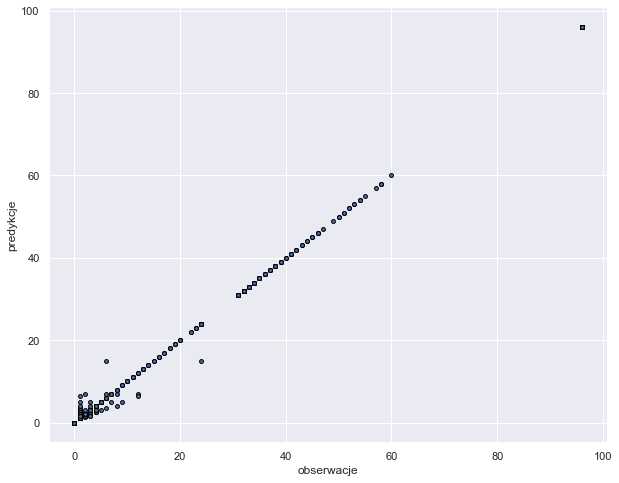

In [38]:
plt.scatter(train_y,reg1.predict(train_X),edgecolor="black",s=15)
plt.xlabel("obserwacje")
plt.ylabel("predykcje")

Text(0, 0.5, 'predykcje')

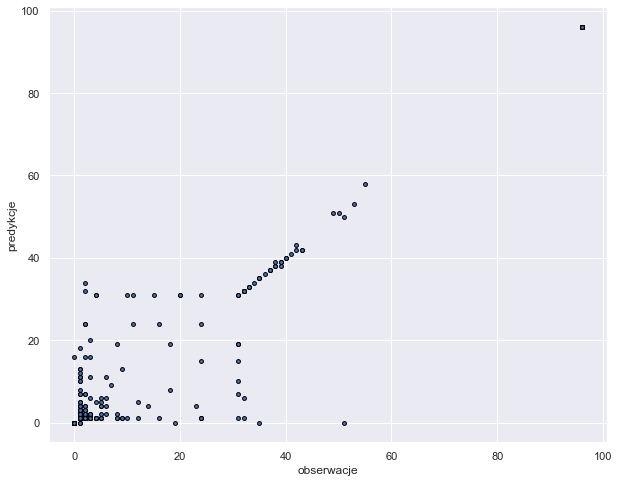

In [39]:
plt.scatter(test_y,y_pred,edgecolor="black",s=15)
plt.xlabel("obserwacje")
plt.ylabel("predykcje")

In [ ]:
np.unique[['AGE'](dfo)]

In [ ]:
dfa=pd.read_csv("./dfa.csv")
dfa

In [ ]:
dfe=pd.read_csv("./exterior.csv")
dfe

In [ ]:
dfv=pd.read_csv("./vehicles.csv")
dfv

In [12]:
# sprawdzamy czy mamy jakies duplikaty w danych
dfo.duplicated().sum()

0

In [34]:
dfv.drop_duplicates(subset=['MANAVAIL','MANFAIL','BODYTYPE', 'MAKE' , 'DVTOTAL','MODELYR'],inplace=True, ignore_index=True)

In [37]:
dfe.drop_duplicates(subset=['CASEID','PSU','DOF1','GAD1'],inplace=True, ignore_index=True)

In [40]:
dfa.drop_duplicates(subset=['STRATIF','PSU','CASEID'],inplace=True, ignore_index=True)

In [8]:
dfo.drop_duplicates(subset=['AGE','BAGAVAIL','BAGDEPLY','BAGFAIL','CASENO','CHTYPE','DEATH','HEIGHT','HOSPSTAY','INJSEV','MANUSE','OCCNO','ROLE','SEATPOS','SEX','TREATMNT','WEIGHT','CASEID','PSU','YEAR'],inplace=True, ignore_index=True)

In [9]:
#zapisane dane do nowej csv
dfo.to_csv('dfo_t.csv', index=False)

In [8]:
# zmieniamy INJSEV na object
dfo.INJSEV = dfo.INJSEV.astype(str)
dfo

,AGE,BAGAVAIL,BAGDEPLY,BAGFAIL,CASENO,CHTYPE,DEATH,HEIGHT,HOSPSTAY,INJSEV,MANUSE,OCCNO,ROLE,SEATPOS,SEX,TREATMNT,WEIGHT,CASEID,PSU,YEAR
0,20.00,1.00,7.00,1.00,1.00,0.00,0.00,178.00,0.00,0.0,4.00,1.00,1.00,11.00,1.00,0.00,73.00,1H,2,2004
1,69.00,1.00,1.00,1.00,2.00,0.00,0.00,178.00,0.00,1.0,4.00,1.00,1.00,11.00,1.00,4.00,86.00,2K,2,2004
2,69.00,1.00,1.00,1.00,2.00,0.00,0.00,168.00,7.00,1.0,4.00,2.00,2.00,13.00,2.00,3.00,68.00,2K,2,2004
3,18.00,1.00,1.00,1.00,2.00,0.00,0.00,NaN,2.00,3.0,4.00,1.00,1.00,11.00,1.00,3.00,NaN,2K,2,2004
4,34.00,1.00,1.00,1.00,2.00,0.00,0.00,NaN,2.00,3.0,4.00,2.00,2.00,13.00,1.00,3.00,NaN,2K,2,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110757,23.00,0.00,0.00,0.00,68.00,0.00,0.00,183.00,0.00,0.0,4.00,5.00,2.00,23.00,1.00,0.00,77.00,68J,82,2015
110758,22.00,0.00,0.00,0.00,68.00,0.00,0.00,163.00,4.00,3.0,0.00,6.00,2.00,25.00,2.00,3.00,59.00,68J,82,2015
110759,26.00,NaN,NaN,NaN,70.00,NaN,NaN,NaN,NaN,0.0,NaN,1.00,1.00,11.00,1.00,NaN,NaN,70H,82,2015
110760,22.00,NaN,NaN,NaN,72.00,NaN,NaN,NaN,NaN,0.0,NaN,1.00,1.00,11.00,1.00,NaN,NaN,72H,82,2015


In [18]:
# zmieniamy MAKE na object
dfv.MAKE = dfv.MAKE.astype(str)
dfv

,MANAVAIL,MANFAIL,BODYTYPE,DVEST,DVBASIS,DVTOTAL,MAKE,MODELYR
0,4.00,1.00,4.00,6.00,11.00,NaN,37.0,1995.00
1,4.00,1.00,4.00,6.00,11.00,NaN,37.0,1995.00
2,4.00,1.00,4.00,6.00,11.00,NaN,37.0,1995.00
3,4.00,1.00,4.00,6.00,11.00,NaN,37.0,1995.00
4,4.00,1.00,4.00,6.00,11.00,NaN,37.0,1995.00
...,...,...,...,...,...,...,...,...
2716422,NaN,NaN,4.00,NaN,NaN,NaN,37.0,2010.00
2716423,NaN,NaN,5.00,NaN,NaN,NaN,48.0,2013.00
2716424,NaN,NaN,5.00,NaN,NaN,NaN,41.0,2007.00
2716425,NaN,NaN,2.00,NaN,0.00,NaN,42.0,1990.00


In [32]:
# usuwanie rekordów
dfv.drop(dfv[dfv.MODELYR == 1930].index, inplace=True)
#app_table.drop(app_table[(app_table['MODELYR'] >1923) & (app_table['MODELYR'] < 1990)].index, inplace=True)

In [ ]:
dfo.groupby('MODELYR')['MODELYR'].count() 

## ANALIZA WIEKU KIEROWCY I JEGO WPŁYWU NA WYPADKI

In [15]:
Age_driver=[]

for i in dfo['AGE']:
    if i>=0 and i<=3:
        Age_driver.append('0-3')
    elif i>=4 and i<=10:
        Age_driver.append('4-10')
    elif i>=11 and i<=20:
        Age_driver.append('11-20')
    elif i>=21 and i<=30:
        Age_driver.append('21-30')
    elif i>=31 and i<=50:
        Age_driver.append('31-50')
    elif i>=51 and i<=70:
        Age_driver.append('51-70')
    elif i>=71:
        Age_driver.append('more_71')
    elif math.isnan(i):
        Age_driver.append(None)

In [16]:
def classification(input_value,partitions): 
    
    for mark,values in  partitions.items():
        if input_value in values: 
            return mark 
         
    return None

In [ ]:
def check_missing():
    for column in df.columns:
        missing = column, df[column].isnull().sum()
        if missing[1] == 0: continue

        print(missing)
        
check_missing()

In [ ]:
missing_perc =( (df.isnull().sum()/df.shape[0]) * 100 ).sort_values(ascending=False)
missing_perc.plot.bar(figsize=(10,5))
plt.title("Brakujace dane [%]", y=1.015)
plt.hlines(xmin=df.index.min(), xmax=df.index.max(), y=40, color='r', linestyle='-.');

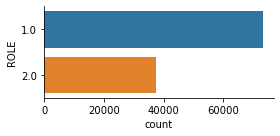

In [16]:
dfo.groupby('ROLE')['ROLE'].count()

sns.catplot(data=dfo,y='ROLE', kind='count',aspect=2,height=2,orient="H")

# 1	Driver
# 2	Passenger
# .U	Unknown

In [9]:
dfo.groupby('INJSEV')['INJSEV'].count() 

# 0	O No Injury
# 1	C Possible Inj
# 2	B Nonimpact
# 3	A Icapacitating
# 4	K Killed
# 5	U Severity Unk
# 6	Died Prior
# .U	Unknown

INJSEV
0.0    40283
1.0    22707
2.0    16488
3.0    22708
4.0     4285
5.0     1969
6.0        8
nan     2314
Name: INJSEV, dtype: int64

In [ ]:
# uzupelnianie z .fillna()
df['AGE'] = df['AGE'].fillna('unknown')
df['STRATIF'] =  df['STRATIF'].fillna('unknown')
df['BODYTYPE'] =  df['BODYTYPE'].fillna('unknown')
df['DOF1'] =  df['DOF1'].fillna('unknown')
df['GAD1'] =  df['GAD1'].fillna('unknown')
df['DVEST'] =  df['DVEST'].fillna('unknown')
df['DVBASIS'] =  df['DVBASIS'].fillna('unknown')
df['DVTOTAL'] =  df['DVTOTAL'].fillna('unknown')
df['MAKE'] =  df['MAKE'].fillna('unknown')
df['MODELYR'] =  df['MODELYR'].fillna('unknown')
df['BAGAVAIL'] =  df['BAGAVAIL'].fillna('unknown')
df['BAGDEPLY'] =  df['BAGDEPLY'].fillna('unknown')
df['BAGFAIL'] =  df['BAGFAIL'].fillna('unknown')
df['DEATH'] =  df['DEATH'].fillna('unknown')
df['HEIGHT'] =  df['HEIGHT'].fillna('unknown')
df['CHTYPE'] =  df['CHTYPE'].fillna('unknown')
df['OCCNO'] =  df['OCCNO'].fillna('unknown')
df['CASENO'] =  df['CASENO'].fillna('unknown')
df['ROLE'] =  df['ROLE'].fillna('unknown')
df['HOSPSTAY'] =  df['HOSPSTAY'].fillna('unknown')
df['INJSEV'] =  df['INJSEV'].fillna('unknown')
df['MANAVAIL'] =  df['MANAVAIL'].fillna('unknown')
df['MANFAIL'] =  df['MANFAIL'].fillna('unknown')
df['MANUSE'] =  df['MANUSE'].fillna('unknown')
df['SEATPOS'] =  df['SEATPOS'].fillna('unknown')
df['SEX'] =  df['SEX'].fillna('unknown')
df['TREATMNT'] =  df['TREATMNT'].fillna('unknown')
df['WEIGHT'] =  df['WEIGHT'].fillna('unknown')

In [ ]:
SEX_new=[]

for i in occupants['SEX']:
    if i==1:
        SEX_new.append(1)
    elif i==2:
        SEX_new.append(2)
    elif i>=3:
        SEX_new.append(3)
    elif math.isnan(i):
        SEX_new.append(None)

## ANALIZA TYPÓW PRZYPADKÓW

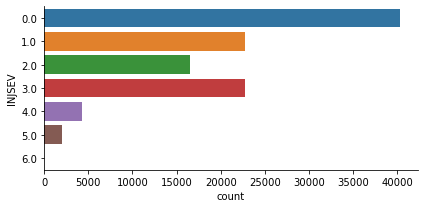

In [17]:
dfo.groupby('INJSEV')['INJSEV'].count()           # skala obrażeń

sns.catplot(data=dfo,y='INJSEV', kind='count',aspect=2,height=3,orient="H")

# 0	O No Injury
# 1	C Possible Inj
# 2	B Nonimpact
# 3	A Icapacitating
# 4	K Killed
# 5	U Severity Unk
# 6	Died Prior
# .U	Unknown

In [ ]:
# kategoryzacja wypadków
stratif_categories =     {0:['A','B'], # at least one occupant fatal injury 
                          1:['J','K'], # incapacitating injury/uraz powodujący niesprawność – hospitalizowany (min. 1noc)
                          2:['C','D'], #  poważne obrażenia – nie hospitalizowany
                          3:['E','F'], # niewielkie obrażenia, ale przewieziony do szpitala
                          4:['G','H']} # niewielkie obrażenia

accident.head(5)
accident["STRATIF_NEW"] = accident["STRATIF"].apply(classification,partitions=stratif_categories)
accident.groupby(['STRATIF','STRATIF_NEW'])['STRATIF'].count()

In [ ]:
result = pd.concat([df1, df4], axis=1)

In [18]:
dfo=dfo.groupby(['AGE'])['STRATIF'].value_counts(normalize=True)
dfo

KeyError: 'Column not found: STRATIF'

In [ ]:
ROLE_new=[]

for i in df['ROLE']:
    if i==1:
        ROLE_new.append(1)
    elif i==2:
        ROLE_new.append(2)
    elif i>=3:
        ROLE_new.append(3)
    elif math.isnan(i):
        ROLE_new.append(None)
df['ROLE_new'].value_counts()
#ROLE_new.value_counts()